In [27]:
import json
import pandas as pd
import mord
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [15]:
# Load data from files
with open('../data/all_windows_classified.json', 'r') as f:
    sentiment_data = json.load(f)

with open('../data/bill_window_matching.json', 'r') as f:
    bill_windows = json.load(f)

with open('../data/bill_data.json', 'r') as f:
    bill_data = json.load(f)

In [32]:
# Aggregate sentiment scores for each bill
bill_sentiment_data = {}
for bill_key in bill_windows:
    ordinality = bill_data[bill_key]['last_action_ordinal']
    bill_sentiment_data[bill_key] = {'positive': 0.0, 'negative': 0.0, 'neutral': 0.0, 'ordinality': ordinality}

    for window_key in bill_windows[bill_key]:
        # Get sentiment with the highest score
        max_sentiment_type = max(sentiment_data[window_key]['sentiment'], key=sentiment_data[window_key]['sentiment'].get)
        if max_sentiment_type in ['positive', 'negative', 'neutral']:
            bill_sentiment_data[bill_key][max_sentiment_type] += sentiment_data[window_key]['sentiment'][max_sentiment_type]

    # Check if any sentiment score was added
    total_sentiment_score = sum(bill_sentiment_data[bill_key].values()) - ordinality
    if total_sentiment_score > 0:
        # Normalize scores to sum up to 1
        for sentiment_type in ['positive', 'negative', 'neutral']:
            bill_sentiment_data[bill_key][sentiment_type] /= total_sentiment_score
    else:
        # Set all sentiment scores to zero
        for sentiment_type in ['positive', 'negative', 'neutral']:
            bill_sentiment_data[bill_key][sentiment_type] = 0.0

# Create dataframe for regression
df = pd.DataFrame.from_dict(bill_sentiment_data, orient='index')
X = df[['positive', 'negative', 'neutral']]
y = df['ordinality']

Mean Absolute Error: 3.4429291740022308


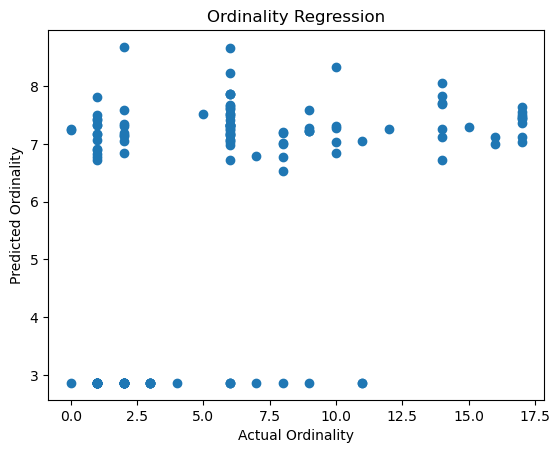

In [29]:

# Fit linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate model performance (optional)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, predictions)
print('Mean Absolute Error:', mae)

# Plot predicted vs actual ordinality values
plt.scatter(y, predictions)
plt.xlabel('Actual Ordinality')
plt.ylabel('Predicted Ordinality')
plt.title('Ordinality Regression')
plt.show()

In [33]:
# Create dataframe for regression
df = pd.DataFrame.from_dict(bill_sentiment_data, orient='index')
X = df[['positive', 'negative', 'neutral']]
y = df['ordinality']

# Fit linear regression
reg = LinearRegression().fit(X, y)

# Print regression coefficients
print('Intercept:', reg.intercept_)
print('Positive coefficient:', reg.coef_[0])
print('Negative coefficient:', reg.coef_[1])
print('Neutral coefficient:', reg.coef_[2])

Intercept: 2.8636363636363655
Positive coefficient: 5.000213521523558
Negative coefficient: 8.437128216235863
Neutral coefficient: 3.795239779927261


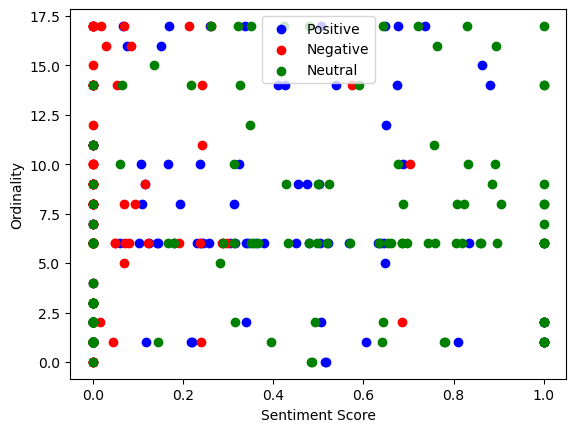

In [34]:
# Scatter plot of data
fig, ax = plt.subplots()
ax.scatter(X['positive'], y, color='blue', label='Positive')
ax.scatter(X['negative'], y, color='red', label='Negative')
ax.scatter(X['neutral'], y, color='green', label='Neutral')
ax.legend(loc='best')

# Add regression line to plot
x_range = range(int(min(X.min())), int(max(X.max())))
y_range = [reg.intercept_ + reg.coef_[0]*x + reg.coef_[1]*y + reg.coef_[2]*z for x, y, z in zip(x_range, x_range, x_range)]
ax.plot(x_range, y_range, color='black')

# Set plot labels
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Ordinality')

# Show plot
plt.show()

In [43]:
# Aggregate sentiment scores for each bill
bill_sentiment_data = {}
for bill_key in bill_windows:
    ordinality = bill_data[bill_key]['last_action_ordinal']
    bill_sentiment_data[bill_key] = {'positive': 0.0, 'negative': 0.0, 'neutral': 0.0, 'ordinality': ordinality}

    num_positive = 0.0
    num_negative = 0
    num_neutral = 0
    num_total = 0.0

    for window_key in bill_windows[bill_key]:
        # Check if sentiment is positive
        max_sentiment_type = max(sentiment_data[window_key]['sentiment'], key=sentiment_data[window_key]['sentiment'].get)
        if max_sentiment_type == 'positive':
            num_positive += 1
        if max_sentiment_type == 'negative':
            num_negative += 1
        if max_sentiment_type == 'neutral':
            num_neutral += 1

    num_total = len(bill_windows[bill_key])

    # Calculate proportion of positive sentiment
    if num_total > 0:
        bill_sentiment_data[bill_key]['positive'] = num_positive / num_total
        bill_sentiment_data[bill_key]['negative'] = num_negative / num_total
        bill_sentiment_data[bill_key]['neutral'] = num_neutral / num_total
    else:
        bill_sentiment_data[bill_key]['positive'] = 0
        bill_sentiment_data[bill_key]['negative'] = 0
        bill_sentiment_data[bill_key]['neutral'] = 0


# Create dataframe for regression
df = pd.DataFrame.from_dict(bill_sentiment_data, orient='index')
X_pos = df[['positive']]
X_neg = df[['negative']]
X_neutral = df[['neutral']]
y = df['ordinality']

# Fit linear regression
positive_reg = LinearRegression().fit(X_pos, y)
negative_reg = LinearRegression().fit(X_neg, y)
neutral_reg = LinearRegression().fit(X_neutral, y)

# Print regression coefficients
print("-------------------Positive-------------------")
print('Positive Intercept:', positive_reg.intercept_)
print('Positive coefficient:', positive_reg.coef_[0])
r_squared = positive_reg.score(X_pos, y)
print('R^2:', r_squared)

# Print regression coefficients
print("-------------------Negative-------------------")
print('negative Intercept:', negative_reg.intercept_)
print('negative coefficient:', negative_reg.coef_[0])
r_squared = negative_reg.score(X_neg, y)
print('R^2:', r_squared)

# Print regression coefficients
print("-------------------Neutral-------------------")
print('Neutral Intercept:', neutral_reg.intercept_)
print('Neutral coefficient:', neutral_reg.coef_[0])
r_squared = neutral_reg.score(X_neutral, y)
print('R^2:', r_squared)

-------------------Positive-------------------
Positive Intercept: 4.868907331927035
Positive coefficient: 4.63841773298808
R^2: 0.07310167981917493
-------------------Negative-------------------
negative Intercept: 5.556837880495786
negative coefficient: 8.824280647110118
R^2: 0.03777077976523058
-------------------Neutral-------------------
Neutral Intercept: 4.538820682433326
Neutral coefficient: 3.233959335846783
R^2: 0.06430984132065032


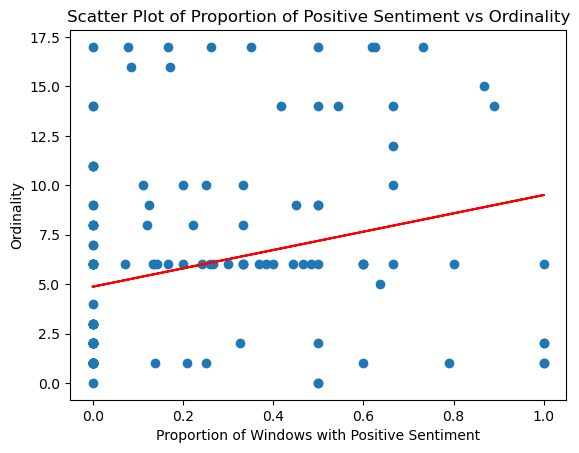

In [38]:
# Create scatter plot
plt.scatter(X, y)

# Add regression line to scatter plot
plt.plot(X, reg.predict(X), color='red')

# Add labels and title
plt.xlabel('Proportion of Windows with Positive Sentiment')
plt.ylabel('Ordinality')
plt.title('Scatter Plot of Proportion of Positive Sentiment vs Ordinality')

# Show plot
plt.show()

In [49]:
# Aggregate sentiment scores for each bill
bill_sentiment_data = {}
for bill_key in bill_windows:
    proportion = 0
    votes = 0
    if 'total_proportion' in bill_data[bill_key]['house_vote']:
        proportion += bill_data[bill_key]['house_vote']['total_proportion']
        votes += 1
    if 'total_proportion' in bill_data[bill_key]['senate_vote']:
        proportion += bill_data[bill_key]['senate_vote']['total_proportion']
        votes += 1
    if votes > 0:
        proportion = proportion / votes

    bill_sentiment_data[bill_key] = {'positive': 0.0, 'negative': 0.0, 'neutral': 0.0, 'proportion': proportion}

    num_positive = 0.0
    num_negative = 0
    num_neutral = 0
    num_total = 0.0

    for window_key in bill_windows[bill_key]:
        # Check if sentiment is positive
        max_sentiment_type = max(sentiment_data[window_key]['sentiment'], key=sentiment_data[window_key]['sentiment'].get)
        if max_sentiment_type == 'positive':
            num_positive += 1
        if max_sentiment_type == 'negative':
            num_negative += 1
        if max_sentiment_type == 'neutral':
            num_neutral += 1

    num_total = len(bill_windows[bill_key])

    # Calculate proportion of positive, negative, and neutral sentiment
    if num_total > 0:
        bill_sentiment_data[bill_key]['positive'] = num_positive / num_total
        bill_sentiment_data[bill_key]['negative'] = num_negative / num_total
        bill_sentiment_data[bill_key]['neutral'] = num_neutral / num_total
    else:
        bill_sentiment_data[bill_key]['positive'] = 0
        bill_sentiment_data[bill_key]['negative'] = 0
        bill_sentiment_data[bill_key]['neutral'] = 0

# Create dataframe for regression
df = pd.DataFrame.from_dict(bill_sentiment_data, orient='index')

# Filter out rows where proportion is 0
df = df[df['proportion'] != 0]

if not df.empty:
    X_pos = df[['positive']]
    y_pos = df['proportion']

    # Fit linear regression for positive sentiment
    positive_reg = LinearRegression().fit(X_pos, y_pos)

    # Print regression coefficients for positive sentiment
    print("-------------------Positive-------------------")
    print('Positive Intercept:', positive_reg.intercept_)
    print('Positive coefficient:', positive_reg.coef_[0])
    r_squared = positive_reg.score(X_pos, y_pos)
    print('R^2:', r_squared)

    X_neg = df[['negative']]
    y_neg = df['proportion']

    # Fit linear regression for negative sentiment
    negative_reg = LinearRegression().fit(X_neg, y_neg)

    # Print regression coefficients for negative sentiment
    print("-------------------Negative-------------------")
    print('Negative Intercept:', negative_reg.intercept_)
    print('Negative coefficient:', negative_reg.coef_[0])
    r_squared = negative_reg.score(X_neg, y_neg)
    print('R^2:', r_squared)

    X_neu = df[['neutral']]
    y_neu = df['proportion']

    # Fit linear regression for neutral sentiment
    neutral_reg = LinearRegression().fit(X_neu, y_neu)
    # Print regression coefficients for negative sentiment
    print("-------------------Negative-------------------")
    print('Negative Intercept:', neutral_reg.intercept_)
    print('Negative coefficient:', neutral_reg.coef_[0])
    r_squared = neutral_reg.score(X_neu, y_neu)
    print('R^2:', r_squared)

    #


-------------------Positive-------------------
Positive Intercept: 0.6335141047006341
Positive coefficient: 0.2533479066825248
R^2: 0.14178738044276173
-------------------Negative-------------------
Negative Intercept: 0.7942272590282271
Negative coefficient: -0.55109343709179
R^2: 0.3492484170148309
-------------------Negative-------------------
Negative Intercept: 0.7117142166012005
Negative coefficient: 0.03490992785230339
R^2: 0.002586210414753931


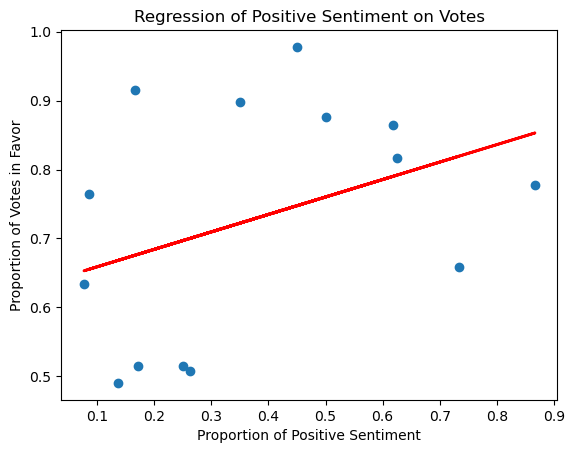

In [47]:
# plot the scatter plot
plt.scatter(X_pos, y_pos)

# plot the regression line
plt.plot(X_pos, positive_reg.predict(X_pos), color='red', linewidth=2)

# add labels and title
plt.xlabel('Proportion of Positive Sentiment')
plt.ylabel('Proportion of Votes in Favor')
plt.title('Regression of Positive Sentiment on Votes')

# show the plot
plt.show()

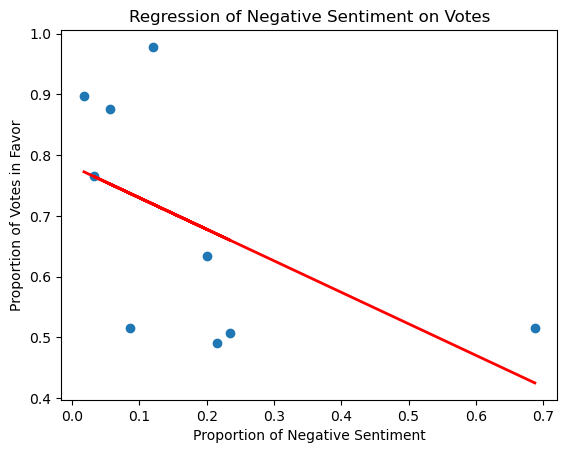

In [50]:
# Filter out rows where proportion is 0 and negative sentiment is greater than 0
df = df[(df['proportion'] != 0) & (df['negative'] > 0)]

if not df.empty:
    X_neg = df[['negative']]
    y_neg = df['proportion']

    # Fit linear regression
    negative_reg = LinearRegression().fit(X_neg, y_neg)

    # plot the scatter plot
    plt.scatter(X_neg, y_neg)

    # plot the regression line
    plt.plot(X_neg, negative_reg.predict(X_neg), color='red', linewidth=2)

    # add labels and title
    plt.xlabel('Proportion of Negative Sentiment')
    plt.ylabel('Proportion of Votes in Favor')
    plt.title('Regression of Negative Sentiment on Votes')

    # show the plot
    plt.show()

else:
    print("There are no bills with non-zero proportion of negative sentiment.")
